# Loading and exploring spring parking brake data

## Systembeschreibung

Das zu betrachtende System ist ein Federspeicherbremszylinder, also ein Bremszylinder, der ohne angelegten Luftdruck die Bremse anlegt. Abhängig von der Federspeicherkraft kann das Fahrzeug (bspw. eine Lokomotive mit vier Federspeichern pro Fahrzeug) im Gefälle stationär gehalten werden oder nicht.

Die 24 Federn pro Zylinder verhalten sich näherungsweise linear, weisen jedoch eine recht große Streuung der Federrate auf. Sie sind zusammen mit einigen geometrischen Größen für die Kraft verantwortlich:

- Force/N: gemessene Kraft des Federspeichers
- Deviation $d$/mm: Abweichung der Dicke des Kolben (Abweichung nach unten: weniger Kraft)
- Deviation $h_{1}$/mm: Abweichung der Lage der Bohrung des Hammerheads (Abweichung nach unten: weniger Kraft)
- Deviation $h_{2}$/mm: Abweichung der Lage der Bohrung des Hammerheads (Abweichung nach unten: weniger Kraft)
- Dev. $l$/mm: Abweichung der Länge der Kolbenstange (Abweichung nach unten: weniger Kraft)

Zusätzlich haben die Daten noch Datum und Zeit der Messung.

## Aufgabe

Nach dem Auftreten eines Fehlers im Feld (Fahrzeug bricht trotz angelegtem Federspeicher los) bekommt ihr aus der Produktion eures Unternehmens die Messdaten aus einer Schicht.

Analysiert die Daten und beantwortet die Fragestellungen: 

- Handelt es sich um ein systematisches Problem?
- Wie viele Einheiten sind betroffen?
- Lässt sich das Problem auf einzelne Maße eingrenzen?

In [1]:
# OS to use file system
import os
# Matplotlib and the pyplot module for a Matlab-like plot syntax
import matplotlib
# This is the syntax to import as a named module
import matplotlib.pyplot as plt
# Pandas is a module for rectangular data "dataframe"
import pandas as pd
# Special module for a very quick analysis
from pandas.plotting import scatter_matrix
# Plot the graphs in the notebook
%matplotlib inline

## Data import

In [2]:
# Import the csv-data to pandas dataframe (canonical name df)
df = pd.read_csv(os.path.join("SpringPBData.csv"))
# Display the first lines of the df
df.head()
#test
#test

,Time,F,d,h1,h2,l
0,2022-10-26 07:30:00,18905.806965,0.005124,-0.047404,-0.031544,0.015860
1,2022-10-26 07:32:00,20026.385396,0.048496,0.008175,-0.014790,-0.022965
2,2022-10-26 07:34:00,19874.917201,-0.013561,0.046190,0.001044,-0.045146
3,2022-10-26 07:36:00,18058.438190,0.048965,-0.026648,-0.072617,-0.045969
4,2022-10-26 07:38:00,18187.872511,0.034729,-0.017012,-0.063248,-0.046235


In [3]:
# Transform first column from string to datetimeindex
df.set_index(pd.to_datetime(df["Time"]), inplace = True)
# Delete second ocurrence of time
df.drop("Time", axis = 1, inplace = True)
df.head()

,F,d,h1,h2,l
Time,,,,,
2022-10-26 07:30:00,18905.806965,0.005124,-0.047404,-0.031544,0.015860
2022-10-26 07:32:00,20026.385396,0.048496,0.008175,-0.014790,-0.022965
2022-10-26 07:34:00,19874.917201,-0.013561,0.046190,0.001044,-0.045146
2022-10-26 07:36:00,18058.438190,0.048965,-0.026648,-0.072617,-0.045969
2022-10-26 07:38:00,18187.872511,0.034729,-0.017012,-0.063248,-0.046235


---

# Euer Bericht "Mangelnde Federspeicherkraft an Lokomotive ABC-123 während Federspeicherprüfung"

## Fragestellung

1. Vorfeld:

- 1.1: Gibt es fehlende Werte in meinen Daten, wird evtl. ein Data Cleaning benötigt?
- 1.2: Gibt es Extremwerte (Outlier) in meinen Daten, welche vor der Analyse entfernt werden müssen?
- 1.3: Wie sind meine Daten verteilt (uniform, unimodal, multimodal, etc.)?
- 1.4: Existieren auffällige Korrelationen zwischen den verschiedenen Features?

2. Analyse (Definition: schlechte Einheiten (F <= 18000N) und gute Einheiten (F > 18000N):

- 2.1: Können die schlechten Einheiten von den guten mit Hilfe der vorhanden Datenbasis unterschieden werden?
- 2.2: Wie viele Einheiten gehören zu den schlechten Einheiten (nach Definition)?
- 2.3: Handelt es sich um ein systematisches oder "zufälliges" Problem (auf Basis vorhandender Daten)?
- 2.4: Lassen sich Muster ist den schlechten Daten erkennen?
    - 2.4.1: Findet das Problem in der Fertigungsschicht nur zu einem bestimmten Zeitpunkt statt?
    - 2.4.2: Lässt sich das Problem auf ein bestimmtes Maß begrenzen bzw. ist ein Maß besonders einflussreich?
    
3. Ausblick:

- 3.1: Können solche Qualitätsprobleme anhand der verfügbaren Daten präventiv verhindert werden?
- 3.2: Durch welche einfachen Methoden kann eine Einheit als schlecht im Vorfeld erkannt werden?

## Analyse

In [4]:
# 1.1: Checking if there are any missing values (NaNs) in the data

print("Missing Values in Features:")

df.isnull().sum()

Missing Values in Features:


F     0
d     0
h1    0
h2    0
l     0
dtype: int64

=> 1.1: Datenset ist sauber und es wird kein Cleaning benötigt

In [5]:
# 1.2: Getting numeric overview about data distribution

print("Describtion of DataFrame:")

df_desc = df.describe()
df_desc

Describtion of DataFrame:


,F,d,h1,h2,l
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,19925.104371,0.001442,-0.002048,-0.002475,-0.000427
std,1741.052226,0.029159,0.028942,0.040490,0.028682
min,15489.816125,-0.049817,-0.049068,-0.097265,-0.049764
25%,18725.767834,-0.022687,-0.027416,-0.028829,-0.023204
50%,19941.716842,0.002220,-0.002563,0.000576,-0.001452
75%,21050.563306,0.026744,0.022772,0.025438,0.024548
max,24712.106835,0.049961,0.049019,0.091062,0.049817


Plotting all Features of DataFrame:


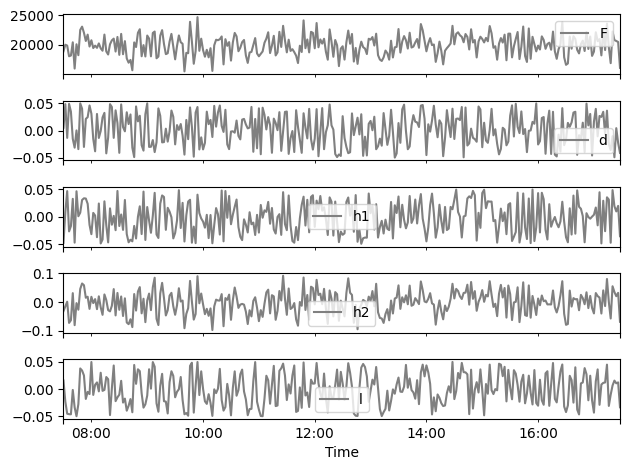

In [6]:
# 1.2: Getting visuall overview about data distribution

print("Plotting all Features of DataFrame:")

df.plot(subplots=True, color = "grey")
plt.tight_layout()
plt.show()

=> 1.2: Es existieren keine Outlier in den Daten

Plotting Histogramm for all Features:


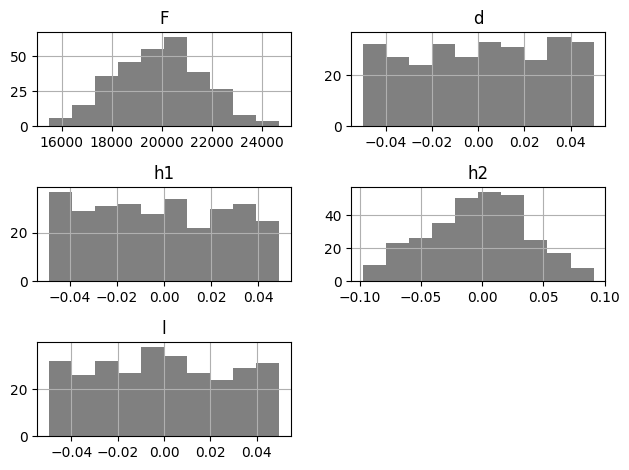

In [7]:
# 1.3: Looking at Feature Distribution for something unusual

print("Plotting Histogramm for all Features:")

df.hist(color="grey")
plt.tight_layout()

=> 1.3: F und h2 sind normal verteilt, während d, h1 und l uniform verteilt sind

In [8]:
import seaborn as sns

[Text(0.5, 1.0, 'Heatmap of Dataframe')]

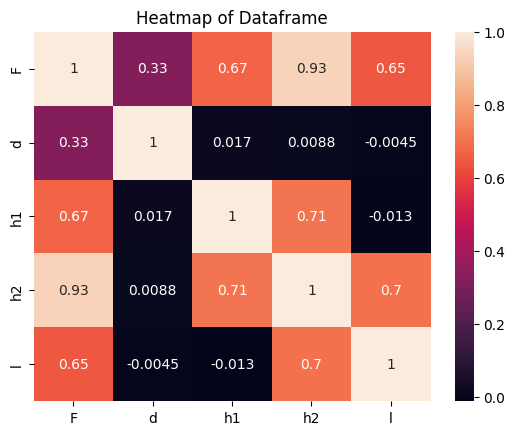

In [9]:
# 1.4: Looking at possible correlations between data via Heatmap

sns.heatmap(df.corr(), annot=True).set(title='Heatmap of Dataframe')

Text(0.5, 1, 'Pairplot of Dataframe')

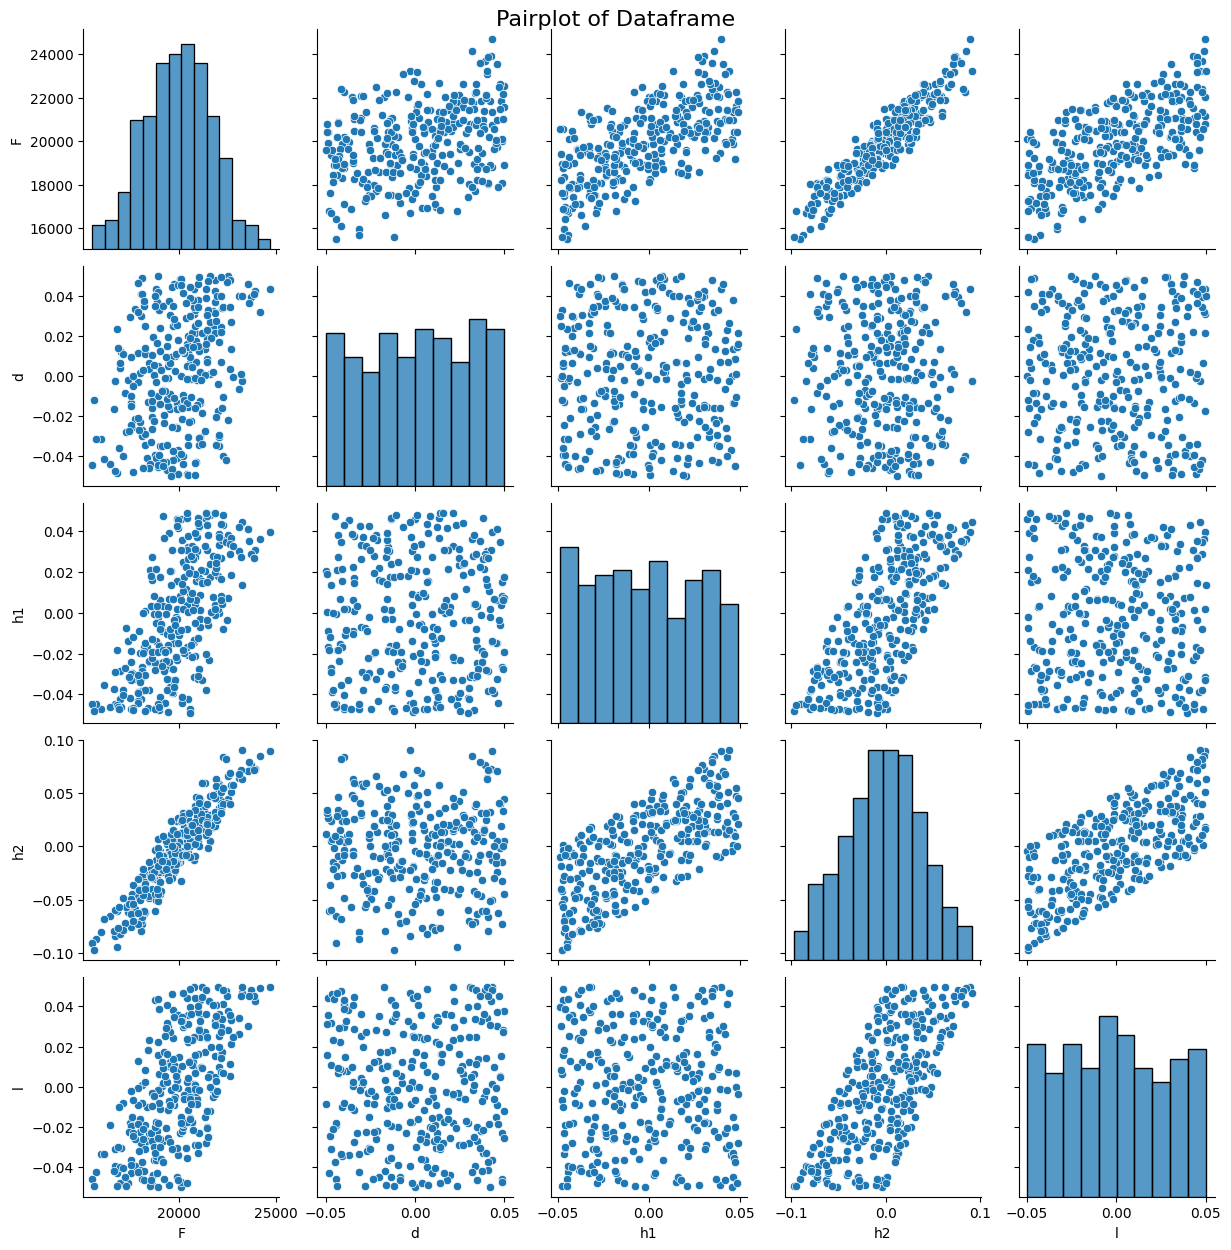

In [10]:
# 1.4: Looking at visual correlation via Pairplotting

pair = sns.pairplot(df)
pair.fig.suptitle('Pairplot of Dataframe',y = 1, fontsize = 16)

=> 1.4: Es existiert eine sehr starke positive, lineare Korrelation von 0.93 zwischen F und h, welches sich auch im Pairplot widerspiegelt (Ein Korrelationskoeffizient von <0.80 bzw. >-0.80 gilt als nicht relevant).

=> 1.4: Zusätzlich ist die Korrelation zwischen von h1 und F (0.67) sowie l und F (0.67) zu erwähnen. Es scheint auch eine Abhängigkeit von h2 zu h1 (0.71) und zu l (0.70) zu existieren. Hervorzuheben ist, dass d als einziges Maß unabhängig von den anderen Größen ist.

In [11]:
# 2.1: Create new Dataframe by seperating bad parts by criterium F <= 18kN and looking at data distribution

print("Describtion of new Dataframe with bad parts:")

df_bad = df[df.F <= 18000]

df_bad_desc = df_bad.describe()
df_bad_desc

Describtion of new Dataframe with bad parts:


,F,d,h1,h2,l
count,42.000000,42.000000,42.000000,42.000000,42.000000
mean,17153.711869,-0.010962,-0.034832,-0.063945,-0.029114
std,671.417501,0.024508,0.011642,0.016403,0.015623
min,15489.816125,-0.048110,-0.048085,-0.097265,-0.049527
25%,16801.135246,-0.027709,-0.044813,-0.076413,-0.042208
50%,17354.570090,-0.012782,-0.037569,-0.062251,-0.031513
75%,17626.250980,0.006011,-0.029148,-0.051054,-0.018785
max,17985.502146,0.046273,-0.007533,-0.030479,0.012766


Text(0.5, 1.0, 'Mean of original dataset vs. bad dataset for all features')

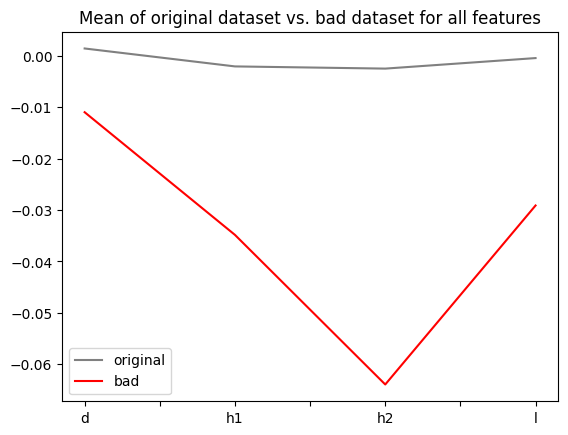

In [12]:
# 2.1: Plotting the mean values from the original DataFrame (df) and the new DataFrame (df_bad) to look for differences

df_desc.loc["mean", df_desc.columns != "F"].plot(color = "grey", label="original")
df_bad_desc.loc["mean", df_desc.columns != "F"].plot(color = "red", label="bad")
plt.legend()
plt.title("Mean of original dataset vs. bad dataset for all features")

=> 2.1: Es wird deutlich, dass sich die Verteilung der Daten für die schlechten Einheiten und dem gesamten DataFrame unterscheiden. Die Mittelwerte für alle Features bewegen sich beim orginalen Datensatz um 0, im Gegensatz dazu befinden sich die Mittelwerte für den schlechten Datensatz ausschließlich im negativen Bereich. Dabei fällt das Feature h2 besonders auf.

In [13]:
# 2.2: Printing count of pad parts

print("Betroffene Elemente: ", len(df_bad))

Betroffene Elemente:  42


=> 2.2: Es sind 42 von 300 Elementen betroffen (14%)

Text(0.5, 1.03, 'Plotting all Features and marking bad parts red')

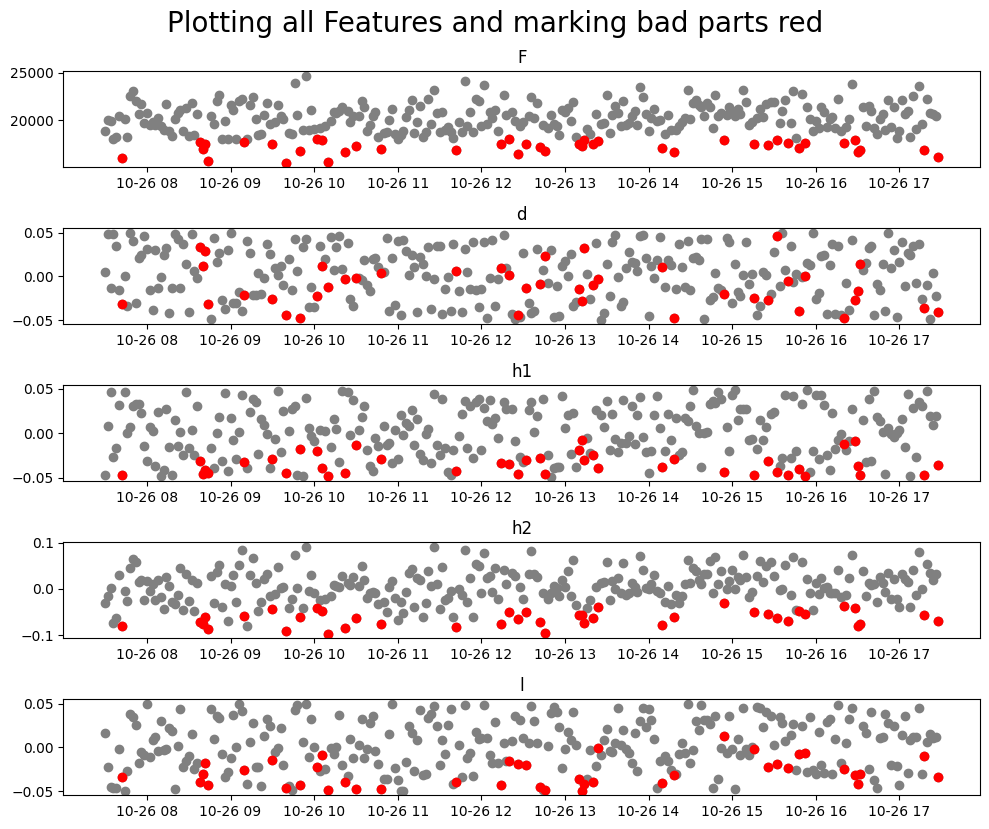

In [14]:
# 2.3 + 2.4.1: Plotting all Features and marking bad parts red to look for patterns

fig, axs = plt.subplots(5,1, figsize=(10,8))

i = 0
for column in df:
    axs[i].plot(df[column], "o", color = "grey")
    axs[i].plot(df_bad[column], "o", color = "red")
    axs[i].set_title(column)
    i += 1

plt.tight_layout()
fig.suptitle("Plotting all Features and marking bad parts red", y=1.03, fontsize=20)

=> 2.3: Es wird deutlich, dass es es sich um ein durchgehend systematisches Problem handelt

=> 2.4.1: Die schlechten Teile verteilen sich auf die gesamte Schicht und nicht nur einen begrenzten Zeitrahmen

=> 2.4.2: Auf Basis der vorherigen Analyse kann festgestellt werden, dass das Maß h2 am deutlichsten die geringe Kraft widerspiegelt

Text(0.5, 1.0, 'Regressionplot for F and h2')

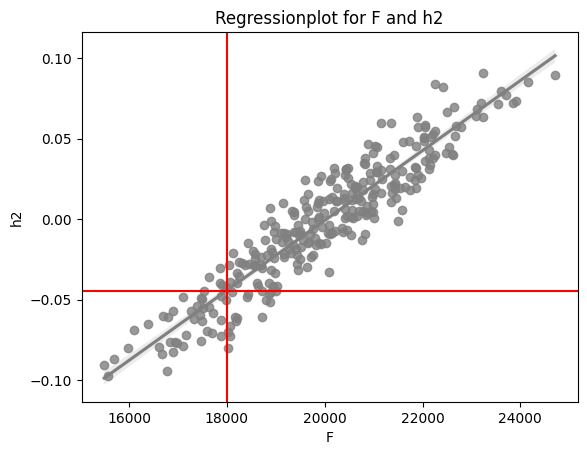

In [15]:
# 3.1 Linear Regression plot of F and h2

sns.regplot(x="F", y="h2", data=df, color="grey")
plt.axvline(18000, color = "red")
plt.axhline(-0.045, color = "red")
plt.title("Regressionplot for F and h2")

=> 3.1: Auf Basis des in der Fertigung gemessenen Maßes h2 kann auf eine schlechte Qualität der Einheit zurückgeschlossen werden. Durch eine gefittete Regressionslinie in der Punktewolke kann abgeschätzt werden, dass ab einem Maß h2 von ca. kleiner als -0.045 mm zu einem schlechten Bauteil führen wird. 

Text(0.5, 1.0, 'Regressionplot for F and sum')

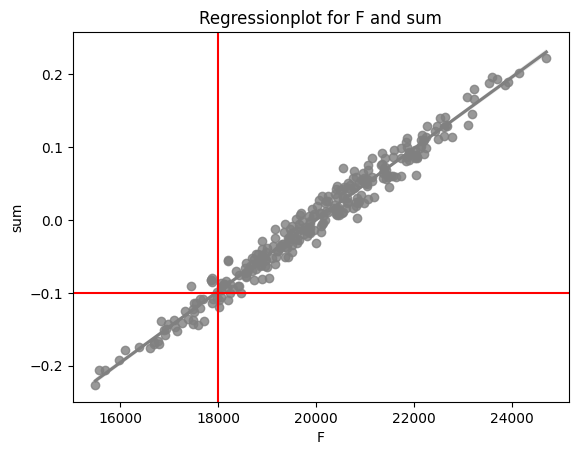

In [16]:
# 3.2 Creation of new Feature "sum" and Linear Regression plot of sum and F

df["sum"] = df.d + df.h1 + df.h2 + df.l

sns.regplot(x="F", y="sum", data=df, color="grey")
plt.axvline(18000, color = "red")
plt.axhline(-0.1, color = "red")
plt.title("Regressionplot for F and sum")

=> 3.2: Durch das Aufsummieren von allen gemessenen Maßen kann eine sogar noch genauere Regressionslinie gefittet werden und somit besser auf eine schlechte Einheit geschlossen werden als nur mit dem Maß h2. Somit kann vorgesagt werden, dass bei der aufsummierten Abweichung von ca. schlechter als -0.1 mm ein Ausschussteil vorliegt.

## Ergebnis

### 1. Vorfeld: 

#### Die Datenqualität ist sehr gut, die Daten haben keine ungewöhnliche Verteilung und es liegt lediglich eine relevante Korrelation (0.93) zwischen F und h2 vor

### 2. Analyse: 

#### Es sind insgesamt 42 von 300 Einheiten von den Qualitätsproblemen (F<18000N) betroffen. Das Problem lässt sich auf keinen  bestimmten Zeitpunkt begrenzen und ist systematisch. Eingrenzen lässt sich hierfür hauptsächlich das Maß h2. 

### 3. Ausblick

#### Die Summe der Abweichungen (besonders h2) sind ausschlaggebend für die fehlende Kraft. Durch eine einfache lineare Regression können hier im Vorfeld ungenügende Einheiten erkannt und ggf. nachgearbeitet werden. Alternativ sollte der gesamte Prozess bezüglich h2 angepasst werden.